In [1]:
import pandas as pd

In [2]:
h3_dict = {
    "4D5_HER2_fitness_1N8Z":   "SRWGGDGFYAMDY",
    "5A12_Ang2_fitness_4ZFG":  "ARFVFFLPYAMDY",
    "5A12_VEGF_fitness_4ZFF":  "ARFVFFLPYAMDY",
}
targets = ["4D5_HER2_fitness_1N8Z","5A12_Ang2_fitness_4ZFG", "5A12_VEGF_fitness_4ZFF"]


In [3]:
top_df = pd.read_csv("../results/flexddg_online/single/top_results.csv")
test_df = pd.read_csv("../results/flexddg_online/single/all_results_test.csv")
all_df =  pd.read_csv("../results/flexddg_online/single/all_results.csv")
Xs = {"flxddg": top_df, "ablang2_perplexity": top_df, "spearman": test_df, "ndcg": test_df}


In [4]:
sum_df_multi = pd.read_csv("../results/flexddg_online/multi/sum_results.csv")
test_df_multi = pd.read_csv("../results/flexddg_online/multi/all_results_test.csv")
all_df_multi =  pd.read_csv("../results/flexddg_online/multi/all_results.csv")
Xs_multi = {"flxddg": sum_df_multi, "ablang2_perplexity": sum_df_multi, "spearman": test_df_multi, "ndcg": test_df_multi}


In [5]:
sum_df_dual = pd.read_csv("../results/flexddg_online/dual/sum_results.csv")
test_df_dual_0  = pd.read_csv("../results/flexddg_online/dual/all_results_test_Ang2.csv")
test_df_dual_1 = pd.read_csv("../results/flexddg_online/dual/all_results_test_VEGF.csv")
all_df_dual = pd.read_csv("../results/flexddg_online/dual/all_results.csv")
Xs_dual = {
    "flxddg_0": sum_df_dual, "flxddg_1": sum_df_dual,
    "ablang2_perplexity": sum_df_dual,
    "spearman_0": test_df_dual_0,"ndcg_0": test_df_dual_0,
    "spearman_1": test_df_dual_1,"ndcg_1": test_df_dual_1
}


In [6]:

import logomaker
def draw_logo(seqs, ax=None):
    if isinstance(seqs, str):
        seqs = [seqs]
    counts_matrix = logomaker.alignment_to_matrix(seqs)

    logo = logomaker.Logo(counts_matrix,
            shade_below=.5,
            fade_below=.5,
            color_scheme='NajafabadiEtAl2017',
            ax=ax
        )
    logo.ax.spines['right'].set_visible(False)
    logo.ax.spines['top'].set_visible(False)
    logo.ax.spines['bottom'].set_visible(False)
    logo.ax.spines['left'].set_visible(False)
    # logo.ax.set_xticks(np.arange(length))
    logo.ax.set_yticks([])


## Single

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
font_size = 15
model2name = {
    "ablang2": "AbLang2",
    "ablang_gp": "GPR(AbLang2)",
}
exp2name_bioff = {'greedy': 'Biased-Online',
 'greedy_unbias': 'Unbiased-Online',
 'greedy_unbias_offline': 'Unbiased-Offline',
 'greedy_offline': 'Biased-Offline',
'ga': "GA"
}
metrics_label = {
    "flxddg": r"TopMean@40",
    "ablang2_perplexity": r"AbLang2 Perplexity",
    'ndcg': 'NDCG@10',
    'spearman': r"Spearman's $\tau$",
}

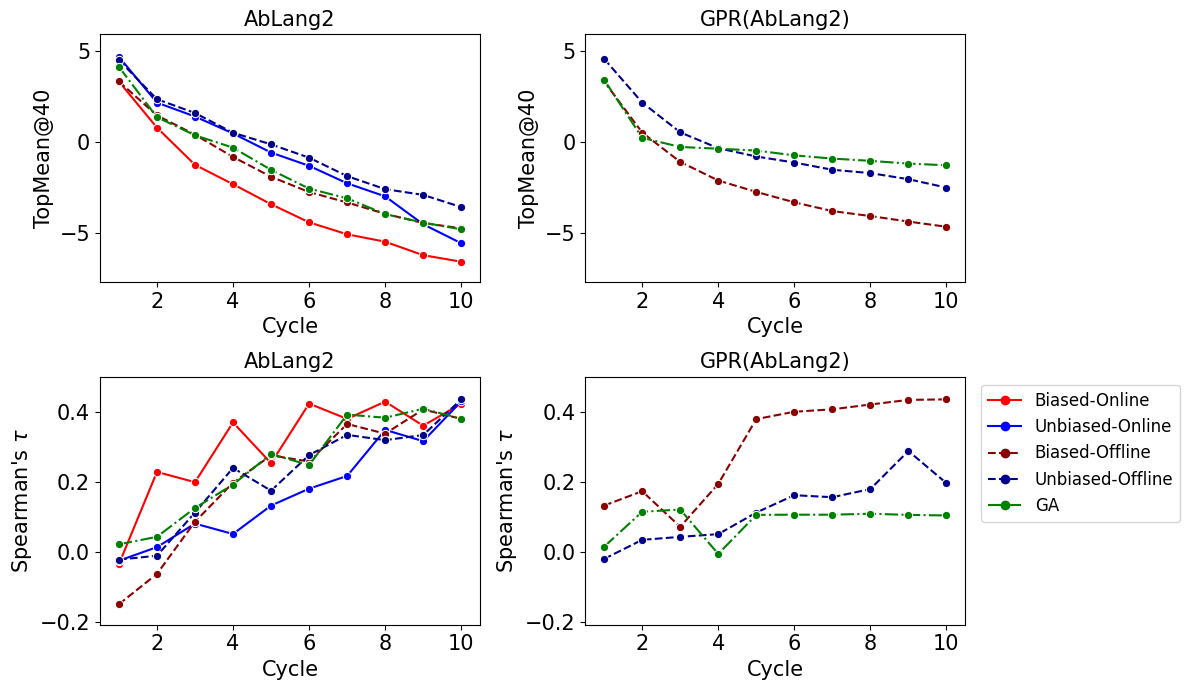

In [8]:

def show_results(X, metric,axes):
    ax = axes[0]
    ymin = np.inf
    ymax = -np.inf
    for model_type, exps_to_plot in [("ablang2", ["greedy","greedy_unbias","greedy_offline", "greedy_unbias_offline", "ga"]), ("ablang_gp", ["greedy_offline", "greedy_unbias_offline", "ga"])]:
        for exp in exps_to_plot:
            select_df = X[(X["model_type"]==model_type) & (X["exp"]==exp)]
            if len(select_df)==0:
                continue
            ymin = min(ymin, select_df.groupby("CYCLE")[metric].mean().min())
            ymax = max(ymax, select_df.groupby("CYCLE")[metric].mean().max())
    ymin = ymin - (ymax-ymin)*0.1
    ymax = ymax + (ymax-ymin)*0.1

    color_dict_bioff = {"greedy":"red", "greedy_unbias":"blue", "greedy_offline":"darkred", "greedy_unbias_offline":"darkblue", "ga": "green"}
    linestyle_dict_bioff = {"greedy":"-", "greedy_unbias":"-", "greedy_offline":"--", "greedy_unbias_offline":"--", "ga": "-."}
    # First subplot for ablang2
    ax.set_title(model2name["ablang2"], fontsize=font_size)
    for model_type in ["ablang2"]:
        for j, exp in enumerate(["greedy","greedy_unbias","greedy_offline", "greedy_unbias_offline", "ga"]):
            select_df = X[(X["model_type"]==model_type) & (X["exp"]==exp)]
            if len(select_df)==0:
                continue
            sns.lineplot(select_df, x="CYCLE", y=metric, ax=ax, label=exp2name_bioff[exp], color=color_dict_bioff[exp], linestyle=linestyle_dict_bioff[exp], marker="o", errorbar=None)
    ax.set_xlim(0.5, 10.5)
    ax.set_xlabel("Cycle",fontsize=font_size)
    ax.set_ylabel(metrics_label[metric],fontsize=font_size)
    ax.tick_params(labelsize=font_size)
    ax.set_ylim(ymin, ymax)
    ax.get_legend().remove()

    ax = axes[1]
    ax.set_title(model2name["ablang_gp"], fontsize=font_size)
    for model_type in ["ablang_gp"]:
        for j, exp in enumerate(["greedy_offline", "greedy_unbias_offline", "ga"]):
            select_df = X[(X["model_type"]==model_type) & (X["exp"]==exp)]
            if len(select_df)==0:
                continue
            sns.lineplot(select_df, x="CYCLE", y=metric, ax=ax, label=exp2name_bioff[exp], color=color_dict_bioff[exp], linestyle=linestyle_dict_bioff[exp], marker="o", errorbar=None)
    ax.set_xlim(0.5, 10.5)
    ax.set_xlabel("Cycle",fontsize=font_size)
    ax.set_ylabel(metrics_label[metric],fontsize=font_size)
    ax.tick_params(labelsize=font_size)
    ax.set_ylim(ymin, ymax)
    ax.get_legend().remove()
    handles = [plt.Line2D([], [], color=color_dict_bioff[exp], linestyle=linestyle_dict_bioff[exp], marker='o', label=exp2name_bioff[exp])
               for exp in ["greedy", "greedy_unbias", "greedy_offline", "greedy_unbias_offline", "ga"]]
    ax.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)
fig, axes = plt.subplots(2, 2, figsize=(12,7))
for i, metric in enumerate(["flxddg", "spearman"]):
    show_results(Xs[metric], metric, axes=axes[i])
axes[0][1].get_legend().remove()
plt.tight_layout()
plt.tight_layout()

## Multi

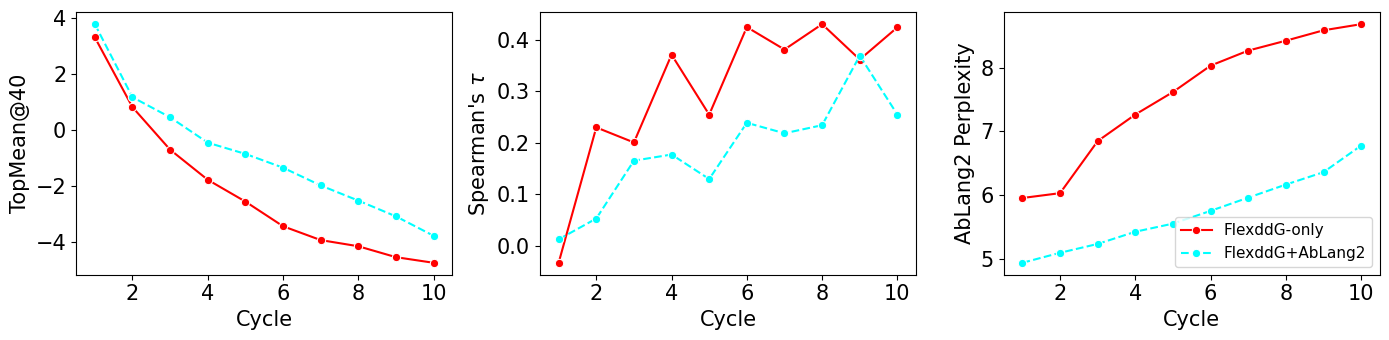

In [9]:
expmulti = {
    "greedy": "FlexddG-only",
    "greedy_multi": "FlexddG+AbLang2",
}
color_dict_multi = {
    "greedy": "red",
    'greedy_multi': 'cyan',
}
linestyle_dict_multi = {
    "greedy": "-",
    'greedy_multi': '--',
}

def show_multi(Xs, exps, metrics_list, figsize=(16,4)):
    fig, axes = plt.subplots(len(metrics_list), len(metrics_list[0]), figsize=figsize)
    for i, metrics in enumerate(metrics_list):
        for j, metric in enumerate(metrics):
            X = Xs[metric]
            if len(metrics_list)==1:
                ax = axes[j]
            else:
                ax = axes[i][j]
            for model_type in ["ablang2"]:
                for k, exp in enumerate(exps):
                    select_df = X[(X["model_type"]==model_type) & (X["exp"]==exp)]
                    if len(select_df)==0:
                        continue
                    sns.lineplot(select_df, x="CYCLE", y=metric, ax=ax, label=expmulti[exp], marker="o", errorbar=None, color=color_dict_multi[exp], linestyle=linestyle_dict_multi[exp])
            ax.set_xlim(0.5, 10.5)
            ax.set_xlabel("Cycle",fontsize=font_size)
            ax.set_ylabel(metrics_label[metric],fontsize=font_size)
            ax.tick_params(labelsize=font_size)
            ax.get_legend().remove()
    ax.legend(loc="lower right", fontsize=11)

    plt.tight_layout()
    return fig, axes
fig, axes = show_multi(Xs_multi, ["greedy", "greedy_multi"], [["flxddg","spearman", "ablang2_perplexity"]], figsize=(14,3.5))
plt.tight_layout()


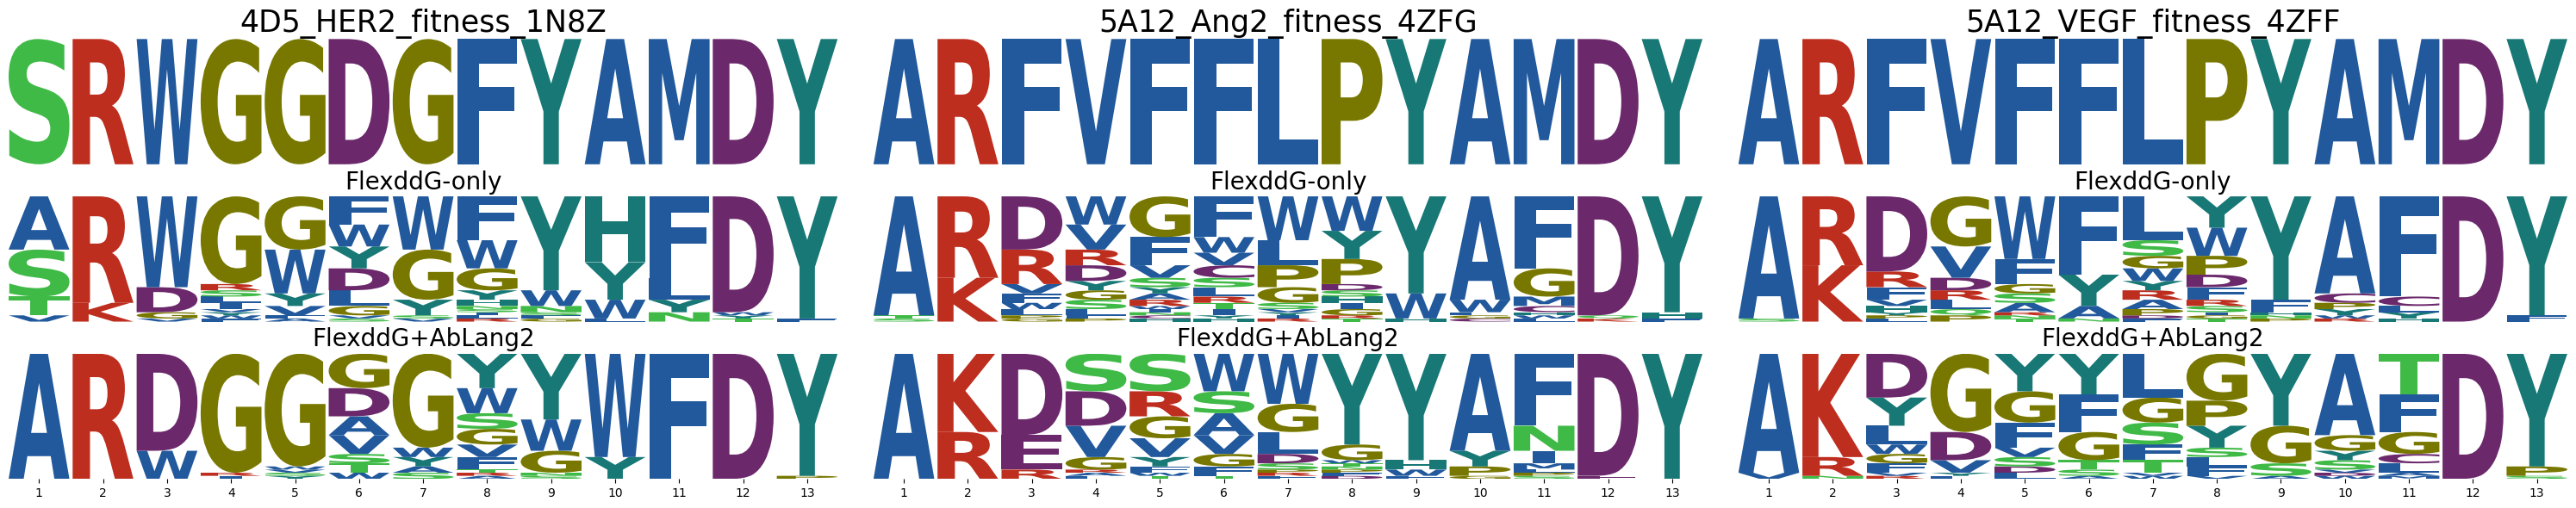

In [10]:
XDF=sum_df_multi

expmulti = {
    "greedy": "FlexddG-only",
    "greedy_multi": "FlexddG+AbLang2",
}

fig, axes = plt.subplots(3, 3, figsize=(30, 6))

for i, target in enumerate(targets):
    h3_seq = h3_dict[target]
    ax=axes[0][i]
    draw_logo(h3_seq, ax=ax)
    ax.set_title(target,fontsize=25)
    ax.set_xticks([])

    seldf = sum_df_multi[(sum_df_multi["CYCLE"]==10)&(sum_df_multi["exp"]=="greedy")&(sum_df_multi["target"]==target)]
    ax = axes[1][i]
    draw_logo(seldf["mutseq"], ax=ax)
    ax.set_title(expmulti["greedy"],fontsize=20)
    ax.set_xticks([])

    ax = axes[2][i]
    seldf = sum_df_multi[(sum_df_multi["CYCLE"]==10)&(sum_df_multi["exp"]=="greedy_multi")&(sum_df_multi["target"]==target)]
    draw_logo(seldf["mutseq"], ax=ax)
    ax.set_title(expmulti["greedy_multi"],fontsize=20)
    ax.set_xticks(range(len(seldf["mutseq"].iloc[0])))
    ax.set_xticklabels(range(1, len(seldf["mutseq"].iloc[0])+1))

plt.tight_layout(h_pad=.5, w_pad=3)


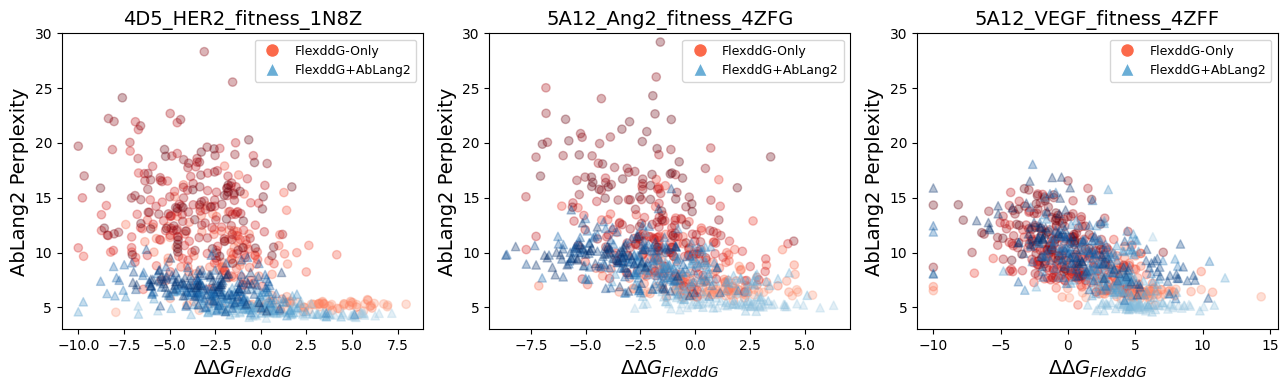

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
for i, target in enumerate(targets):
    ax = axes[i]
    seldf1 = all_df_multi[(all_df_multi["target"]==target)&(all_df_multi["exp"]=="greedy")&(all_df_multi["CYCLE"]==10)]
    seldf2 = all_df_multi[(all_df_multi["target"]==target)&(all_df_multi["exp"]=="greedy_multi")&(all_df_multi["CYCLE"]==10)]
    norm = plt.Normalize(-5, max(seldf1["cycle"].max(), seldf2["cycle"].max()))
    ax.scatter(seldf1["flxddg"].clip(-10), seldf1["ablang2_perplexity"], c=seldf1["cycle"], cmap="Reds", alpha=0.3, norm=norm)
    ax.scatter(seldf2["flxddg"].clip(-10), seldf2["ablang2_perplexity"], c=seldf2["cycle"], cmap="Blues", alpha=0.3, marker="^", norm=norm)
    ax.set_xlabel("$\Delta \Delta G_{FlexddG}$", fontsize=14)
    ax.set_ylabel("AbLang2 Perplexity", fontsize=14)
    ax.set_title(target, fontsize=14)
    
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Reds(.5), markersize=10, label='FlexddG-Only'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor=plt.cm.Blues(.5), markersize=10, label='FlexddG+AbLang2')
    ]
    ax.legend(handles=legend_elements, fontsize=9)
    
    ax.set_ylim(3,30)
plt.tight_layout()


## Dual

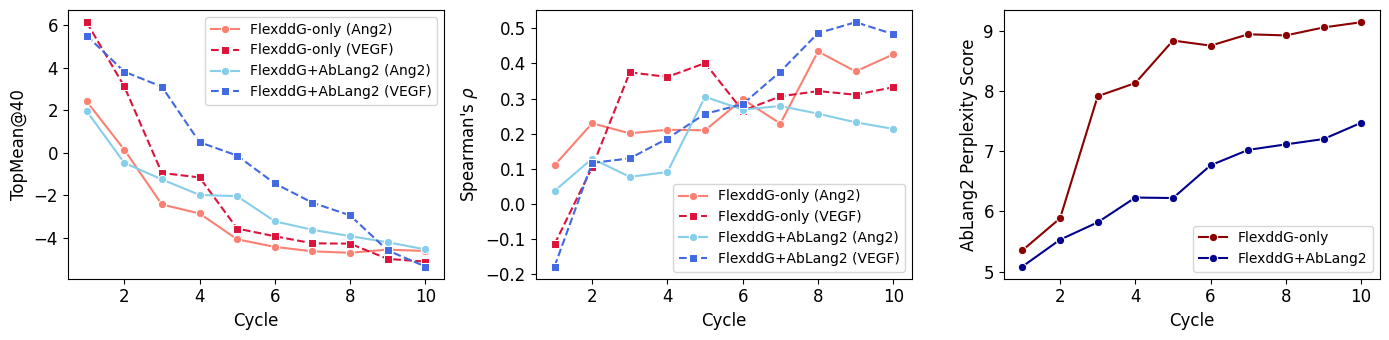

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Existing settings
metrics_label = {
    "flxddg": r"TopMean@40",
    "flxddg_0": r"TopMean@40 of Ang2",
    "flxddg_1": r"TopMean@40 of VEGF",
    "ablang2_perplexity": r"AbLang2 Perplexity Score",
    'ndcg': 'NDCG@10',
    'spearman': r"Spearman's $\rho$",
    'spearman_0': r"Spearman's $\rho$ (Ang2)",
    'spearman_1': r"Spearman's $\rho$ (VEGF)",
}

# Experiment display names
expmulti = {
    "greedy_dual": "FlexddG-only",
    'greedy_dual_multi': 'FlexddG+AbLang2'
}

color_dict = {
    ("greedy_dual_multi", 0): "skyblue",
    ("greedy_dual_multi", 1): "royalblue",
    ("greedy_dual", 0): "salmon",
    ("greedy_dual", 1): "crimson"
}

# Line style settings
linestyle_dict = {
    0: "-",      # Solid line for Ang2
    1: "--"      # Dashed line for VEGF
}

# Marker settings
marker_dict = {
    0: "o",      # Circle for Ang2
    1: "s"       # Square for VEGF
}

font_size = 12  # Font size setting

def show_dual(Xs, exps, metric_pairs, figsize=(16, 6)):
    fig, axes = plt.subplots(1, len(metric_pairs), figsize=figsize)

    # Handle case when there's only one metric pair
    if len(metric_pairs) == 1:
        axes = [axes]

    for j, (metrics) in enumerate(metric_pairs):
        ax = axes[j]
        if len(metrics) == 1:
            metric = metrics[0]
            for exp in exps:
                X = Xs[metric]
                select_df = X[(X["model_type"]=="ablang2") & (X["exp"]==exp)]

                if len(select_df) == 0:
                    continue

                # Create label (experiment name only)
                label = expmulti[exp]

                # Use similar but different colors for single metric
                color = "darkred" if exp == "greedy_dual" else "darkblue"

                # Plot
                sns.lineplot(
                    select_df, x="CYCLE", y=metric, ax=ax,
                    label=label, marker='o', errorbar=None,
                    color=color, linestyle='-'
                )
        else:
            metrics_0 = metrics[0]
            metric = metrics_0
            metrics_1 = metrics[1]
            for exp in exps:
                for target_idx, metric in [(0, metrics_0), (1, metrics_1)]:
                    X = Xs[metric]
                    select_df = X[(X["model_type"]=="ablang2") & (X["exp"]==exp)]

                    if len(select_df) == 0:
                        continue

                    # Create label (experiment name + target name)
                    target_name = "Ang2" if target_idx == 0 else "VEGF"
                    label = f"{expmulti[exp]} ({target_name})"

                    # Get color and style
                    color = color_dict.get((exp, target_idx))
                    linestyle = linestyle_dict.get(target_idx)
                    marker = marker_dict.get(target_idx)

                    # Plot
                    sns.lineplot(
                        select_df, x="CYCLE", y=metric, ax=ax,
                        label=label, marker=marker, errorbar=None,
                        color=color, linestyle=linestyle
                    )
        # Graph settings
        ax.set_xlim(0.5, 10.5)
        ax.set_xlabel("Cycle", fontsize=font_size)

        # Y-axis label setting (use common part between Ang2 and VEGF)
        base_metric = metric.split('_')[0]  if metric !="ablang2_perplexity" else "ablang2_perplexity" # 'flxddg' or 'spearman'
        ax.set_ylabel(metrics_label[base_metric], fontsize=font_size)

        ax.tick_params(labelsize=font_size)
        ax.legend(fontsize=font_size-2)

    plt.tight_layout()
    return fig, axes


fig, axes = show_dual(
    Xs_dual,
    ["greedy_dual", "greedy_dual_multi"],
    [("flxddg_0", "flxddg_1"), ("spearman_0", "spearman_1"), ("ablang2_perplexity",)],
    figsize=(14, 3.5)
)


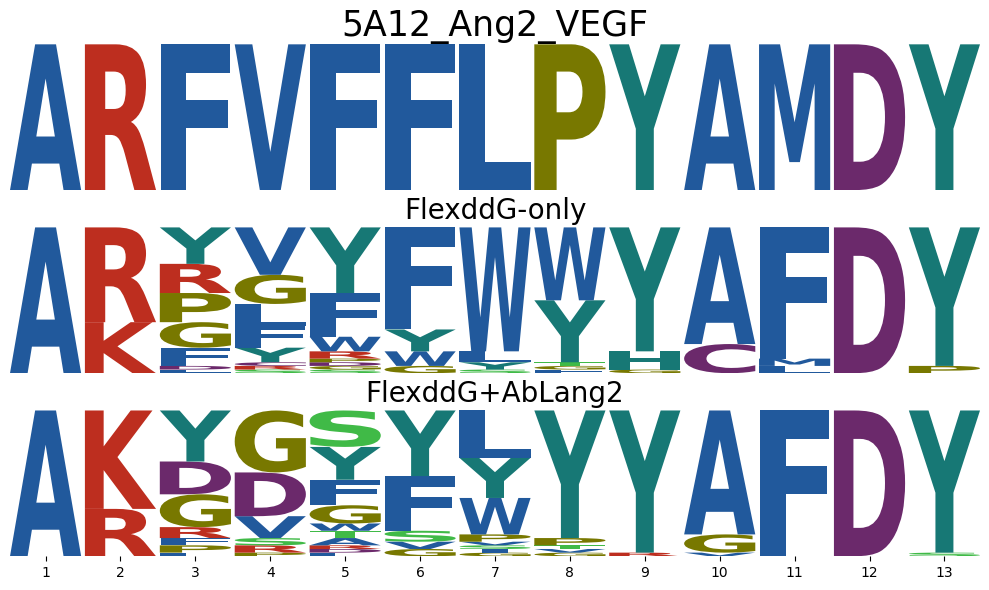

In [14]:
X=sum_df_dual

expmulti = {
    "greedy_dual": "FlexddG-only",
    'greedy_dual_multi': 'FlexddG+AbLang2'
}
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

h3_seq = h3_dict['5A12_Ang2_fitness_4ZFG']
ax=axes[0]
draw_logo(h3_seq, ax=ax)
ax.set_title("5A12_Ang2_VEGF",fontsize=25)
ax.set_xticks([])

seldf = sum_df_dual[(sum_df_dual["exp"]=="greedy_dual") & (sum_df_dual["CYCLE"]==10)]
ax = axes[1]
draw_logo(seldf["mutseq"], ax=ax)
ax.set_title(expmulti["greedy_dual"],fontsize=20)
ax.set_xticks([])

ax = axes[2]
seldf = sum_df_dual[(sum_df_dual["exp"]=="greedy_dual_multi") & (sum_df_dual["CYCLE"]==10)]
draw_logo(seldf["mutseq"], ax=ax)
ax.set_title(expmulti["greedy_dual_multi"],fontsize=20)
ax.set_xticks(range(len(seldf["mutseq"].iloc[0])))
ax.set_xticklabels(range(1, len(seldf["mutseq"].iloc[0])+1))

plt.tight_layout(h_pad=.5, w_pad=3)
plt.show()

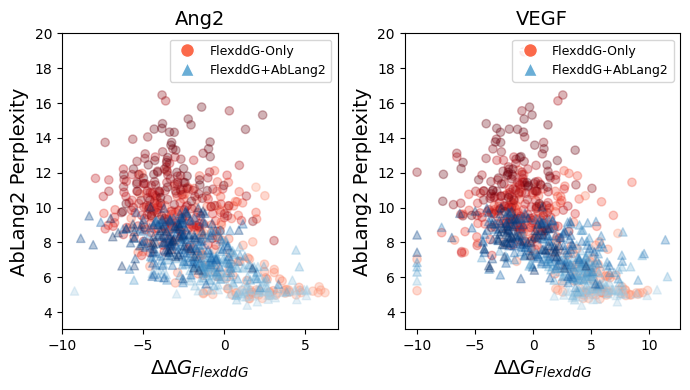

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

label2s={"flxddg_0": "Ang2", "flxddg_1": "VEGF"}
for i, label in enumerate(["flxddg_0", "flxddg_1"]):
    ax = axes[i]
    seldf1 = all_df_dual[(all_df_dual["exp"]=="greedy_dual")&(all_df_dual["CYCLE"]==10)]
    seldf2 = all_df_dual[(all_df_dual["exp"]=="greedy_dual_multi")&(all_df_dual["CYCLE"]==10)]
    norm = plt.Normalize(-5, max(seldf1["cycle"].max(), seldf2["cycle"].max()))
    ax.scatter(seldf1[label].clip(-10), seldf1["ablang2_perplexity"], c=seldf1["cycle"], cmap="Reds", alpha=0.3, norm=norm)
    ax.scatter(seldf2[label].clip(-10), seldf2["ablang2_perplexity"], c=seldf2["cycle"], cmap="Blues", alpha=0.3, marker="^", norm=norm)
    ax.set_xlabel("$\Delta \Delta G_{FlexddG}$", fontsize=14)
    ax.set_ylabel("AbLang2 Perplexity", fontsize=14)
    ax.set_title(label2s[label], fontsize=14)
    
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Reds(.5), markersize=10, label='FlexddG-Only'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor=plt.cm.Blues(.5), markersize=10, label='FlexddG+AbLang2')
    ]
    ax.legend(handles=legend_elements, fontsize=9)
    
    ax.set_ylim(3,20)
plt.tight_layout()
